TSNE and UMAP run with the 4 groups (HDACs/SIRTS, HATS, TFs, and Ion Channels)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import manifold
import seaborn as sns
import math
import scipy

In [2]:
data = pd.read_csv('MaleFemalePheno.csv')

In [3]:
HnS = ['HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11', 'SIRT1', 'SIRT2', 'SIRT3', 'SIRT4', 'SIRT5', 'SIRT6', 'SIRT7']
HATs = ['KAT2A', 'KAT2B', 'HAT1', 'ATF2', 'KAT5', 'KAT6A', 'KAT6B', 'KAT7', 'EP300', 'CREBBP', 'NCOA1', 'NCOA3', 'TAF1', 'GTF3C1', 'CLOCK']
iChannels = ['SCN5A', 'CACNA1C', 'KCNH2', 'KCNJ2', 'ATP1A1', 'SLC8A1', 'ATP2A2', 'RYR2', 'GJA1']
TFs = ['FOXO1', 'FOXO3', 'GATA4', 'GATA6', 'HIF1A', 'TRIM28', 'KLF4', 'KLF5', 'MEF2A', 'NFAT5', 'NFKB1', 'NKX25', 'NOTCH1', 'RUNX1', 'SHMT2', 'SOD1', 'TBX5', 'TGFB1', 'YY1']

In [4]:
HnS_data = data[HnS]
HATs_data = data[HATs]
iChannels_data = data[iChannels]
TFs_data = data[TFs]
Sex = data['Sex']

In [5]:
metric = 'euclidean'
# metrics: cosine, euclidean, manhattan, braycurtis, canberra, chebyshev, correlation

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#Scaling the data to see if that would make a difference in the embedding
scaler = StandardScaler()
HnS_data_s = scaler.fit_transform(HnS_data)
HATs_data_s = scaler.fit_transform(HATs_data)
iChannels_data_s = scaler.fit_transform(iChannels_data)
TFs_data_s = scaler.fit_transform(TFs_data)

In [8]:
from sklearn.manifold import TSNE
import umap

In [9]:
#create embedder object
embedder_t = TSNE(method = 'exact', metric = metric, square_distances = True, learning_rate = 'auto', init = 'random')
embedder_u = umap.UMAP(metric = metric)

In [10]:
#Train and fit and transform data
embedding_t_HnS = embedder_t.fit_transform(HnS_data)
embedding_t_HATs = embedder_t.fit_transform(HATs_data)
embedding_t_iChannels = embedder_t.fit_transform(iChannels_data)
embedding_t_TFs = embedder_t.fit_transform(TFs_data)
embedding_t_HnS_s = embedder_t.fit_transform(HnS_data_s)
embedding_t_HATs_s = embedder_t.fit_transform(HATs_data_s)
embedding_t_iChannels_s = embedder_t.fit_transform(iChannels_data_s)
embedding_t_TFs_s = embedder_t.fit_transform(TFs_data_s)

Text(0.5, 1.0, 'TFs Normalized')

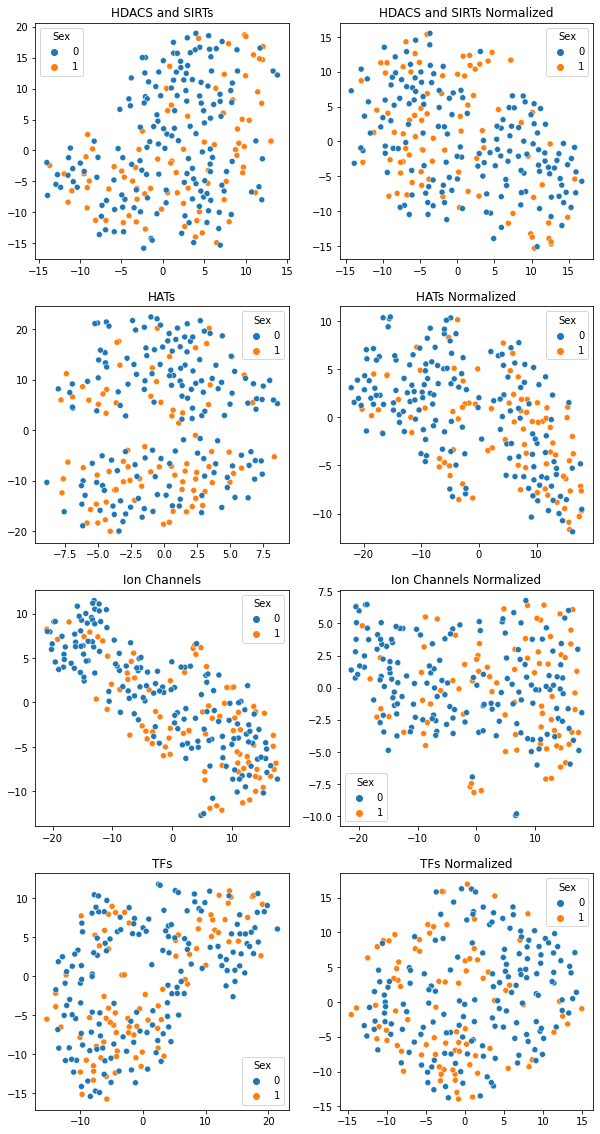

In [11]:
fig, axs = plt.subplots(4,2, figsize = (10,20))
sns.scatterplot(ax = axs[0][0], x = embedding_t_HnS[:,0] , y = embedding_t_HnS[:,1], hue = Sex)
axs[0][0].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][0], x = embedding_t_HATs[:,0] , y = embedding_t_HATs[:,1], hue = Sex)
axs[1][0].set_title('HATs')
sns.scatterplot(ax = axs[2][0], x = embedding_t_iChannels[:,0] , y = embedding_t_iChannels[:,1], hue = Sex)
axs[2][0].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][0], x = embedding_t_TFs[:,0] , y = embedding_t_TFs[:,1], hue = Sex)
axs[3][0].set_title('TFs')
sns.scatterplot(ax = axs[0][1], x = embedding_t_HnS_s[:,0] , y = embedding_t_HnS_s[:,1], hue = Sex)
axs[0][1].set_title('HDACS and SIRTs Normalized')
sns.scatterplot(ax = axs[1][1], x = embedding_t_HATs_s[:,0] , y = embedding_t_HATs_s[:,1], hue = Sex)
axs[1][1].set_title('HATs Normalized')
sns.scatterplot(ax = axs[2][1], x = embedding_t_iChannels_s[:,0] , y = embedding_t_iChannels_s[:,1], hue = Sex)
axs[2][1].set_title('Ion Channels Normalized')
sns.scatterplot(ax = axs[3][1], x = embedding_t_TFs_s[:,0] , y = embedding_t_TFs_s[:,1], hue = Sex)
axs[3][1].set_title('TFs Normalized')

The embedding does not seperate male and female samples.

In [12]:
embedding_u_HnS = embedder_u.fit_transform(HnS_data)
embedding_u_HATs = embedder_u.fit_transform(HATs_data)
embedding_u_iChannels = embedder_u.fit_transform(iChannels_data)
embedding_u_TFs = embedder_u.fit_transform(TFs_data)
embedding_u_HnS_s = embedder_u.fit_transform(HnS_data_s)
embedding_u_HATs_s = embedder_u.fit_transform(HATs_data_s)
embedding_u_iChannels_s = embedder_u.fit_transform(iChannels_data_s)
embedding_u_TFs_s = embedder_u.fit_transform(TFs_data_s)

Text(0.5, 1.0, 'TFs')

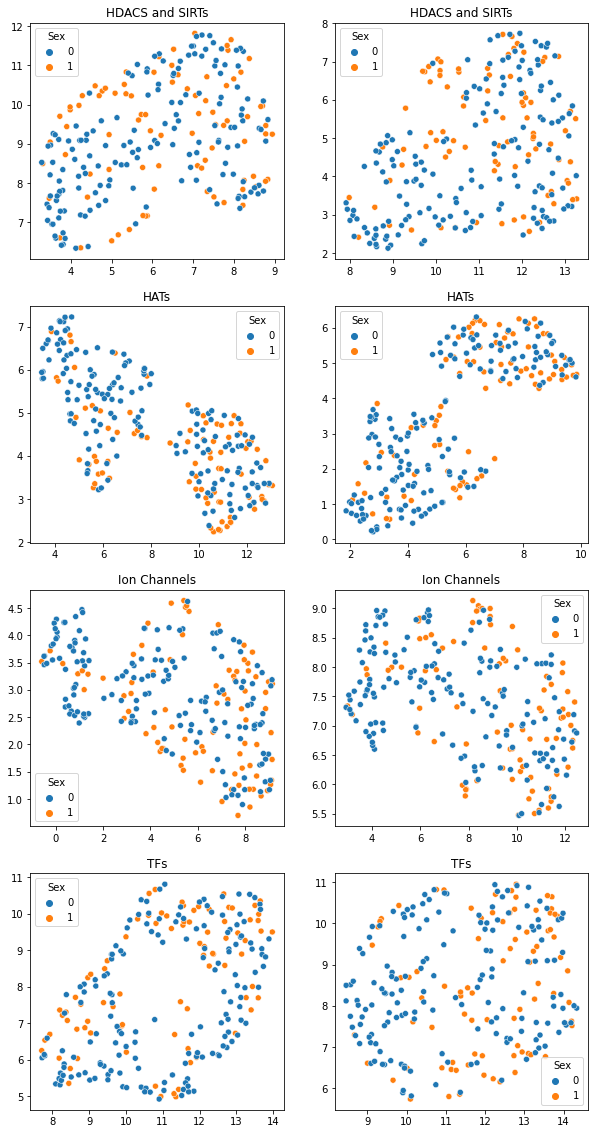

In [13]:
fig, axs = plt.subplots(4,2, figsize = (10,20))
sns.scatterplot(ax = axs[0][0], x = embedding_u_HnS[:,0] , y = embedding_u_HnS[:,1], hue = Sex)
axs[0][0].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][0], x = embedding_u_HATs[:,0] , y = embedding_u_HATs[:,1], hue = Sex)
axs[1][0].set_title('HATs')
sns.scatterplot(ax = axs[2][0], x = embedding_u_iChannels[:,0] , y = embedding_u_iChannels[:,1], hue = Sex)
axs[2][0].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][0], x = embedding_u_TFs[:,0] , y = embedding_u_TFs[:,1], hue = Sex)
axs[3][0].set_title('TFs')
sns.scatterplot(ax = axs[0][1], x = embedding_u_HnS_s[:,0] , y = embedding_u_HnS_s[:,1], hue = Sex)
axs[0][1].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][1], x = embedding_u_HATs_s[:,0] , y = embedding_u_HATs_s[:,1], hue = Sex)
axs[1][1].set_title('HATs')
sns.scatterplot(ax = axs[2][1], x = embedding_u_iChannels_s[:,0] , y = embedding_u_iChannels_s[:,1], hue = Sex)
axs[2][1].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][1], x = embedding_u_TFs_s[:,0] , y = embedding_u_TFs_s[:,1], hue = Sex)
axs[3][1].set_title('TFs')

Embedding does not sepereate male and female, but there is something causing seperation.

HDACS and SIRTS

In [14]:
var = data['SMRIN']

Text(0.5, 1.0, 'TFs Normalized')

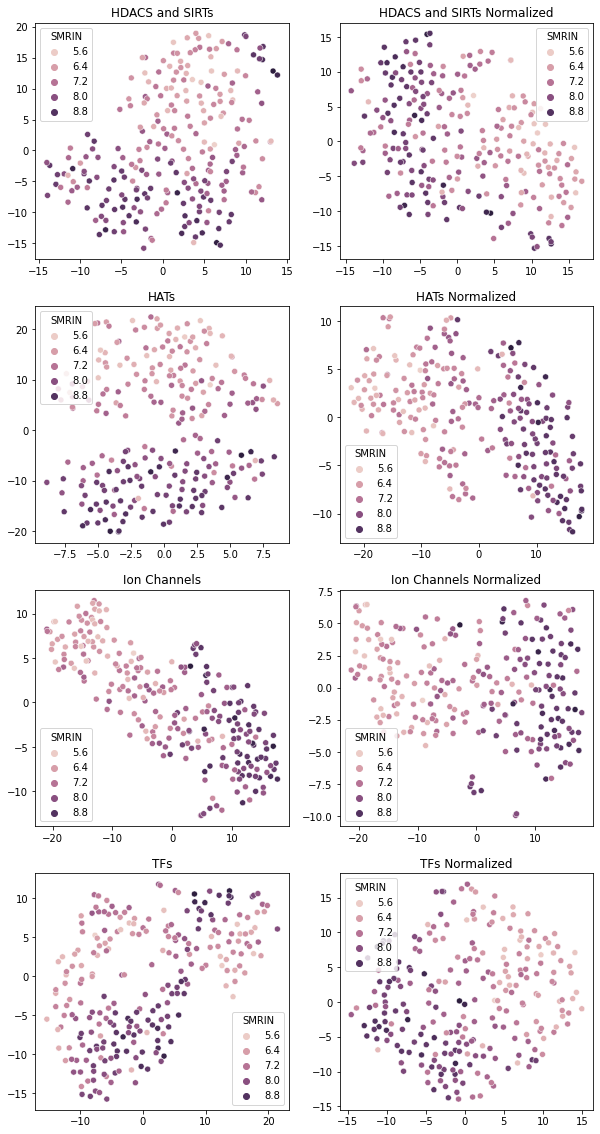

In [15]:
fig, axs = plt.subplots(4,2, figsize = (10,20))
sns.scatterplot(ax = axs[0][0], x = embedding_t_HnS[:,0] , y = embedding_t_HnS[:,1], hue = var)
axs[0][0].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][0], x = embedding_t_HATs[:,0] , y = embedding_t_HATs[:,1], hue = var)
axs[1][0].set_title('HATs')
sns.scatterplot(ax = axs[2][0], x = embedding_t_iChannels[:,0] , y = embedding_t_iChannels[:,1], hue = var)
axs[2][0].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][0], x = embedding_t_TFs[:,0] , y = embedding_t_TFs[:,1], hue = var)
axs[3][0].set_title('TFs')
sns.scatterplot(ax = axs[0][1], x = embedding_t_HnS_s[:,0] , y = embedding_t_HnS_s[:,1], hue = var)
axs[0][1].set_title('HDACS and SIRTs Normalized')
sns.scatterplot(ax = axs[1][1], x = embedding_t_HATs_s[:,0] , y = embedding_t_HATs_s[:,1], hue = var)
axs[1][1].set_title('HATs Normalized')
sns.scatterplot(ax = axs[2][1], x = embedding_t_iChannels_s[:,0] , y = embedding_t_iChannels_s[:,1], hue = var)
axs[2][1].set_title('Ion Channels Normalized')
sns.scatterplot(ax = axs[3][1], x = embedding_t_TFs_s[:,0] , y = embedding_t_TFs_s[:,1], hue = var)
axs[3][1].set_title('TFs Normalized')

Text(0.5, 1.0, 'TFs')

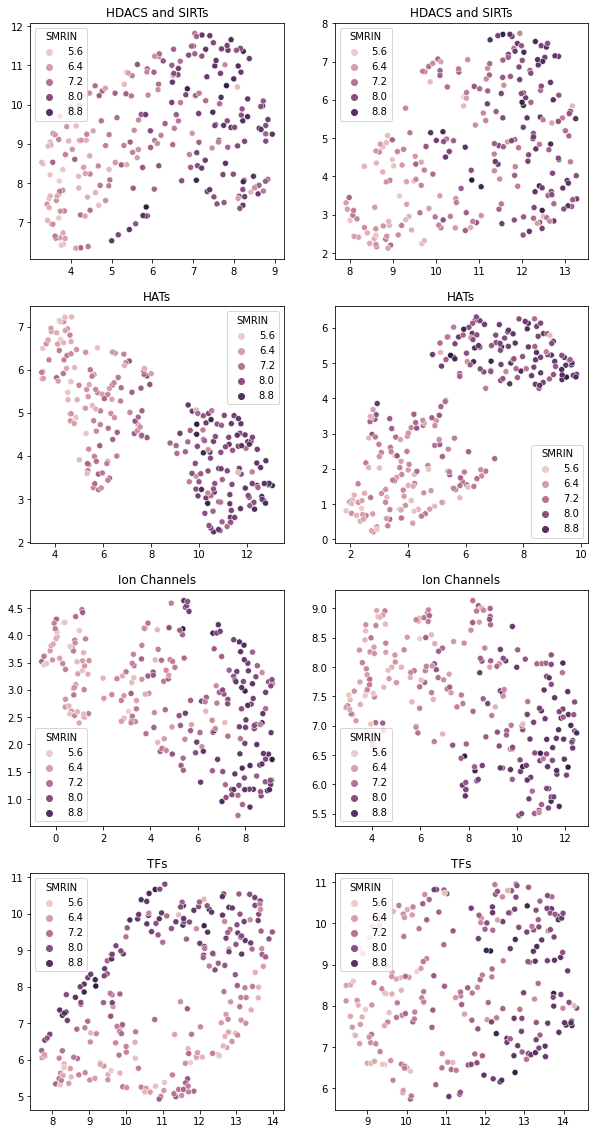

In [16]:
fig, axs = plt.subplots(4,2, figsize = (10,20))
sns.scatterplot(ax = axs[0][0], x = embedding_u_HnS[:,0] , y = embedding_u_HnS[:,1], hue = var)
axs[0][0].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][0], x = embedding_u_HATs[:,0] , y = embedding_u_HATs[:,1], hue = var)
axs[1][0].set_title('HATs')
sns.scatterplot(ax = axs[2][0], x = embedding_u_iChannels[:,0] , y = embedding_u_iChannels[:,1], hue = var)
axs[2][0].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][0], x = embedding_u_TFs[:,0] , y = embedding_u_TFs[:,1], hue = var)
axs[3][0].set_title('TFs')
sns.scatterplot(ax = axs[0][1], x = embedding_u_HnS_s[:,0] , y = embedding_u_HnS_s[:,1], hue = var)
axs[0][1].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][1], x = embedding_u_HATs_s[:,0] , y = embedding_u_HATs_s[:,1], hue = var)
axs[1][1].set_title('HATs')
sns.scatterplot(ax = axs[2][1], x = embedding_u_iChannels_s[:,0] , y = embedding_u_iChannels_s[:,1], hue = var)
axs[2][1].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][1], x = embedding_u_TFs_s[:,0] , y = embedding_u_TFs_s[:,1], hue = var)
axs[3][1].set_title('TFs')

In [17]:
#Checking to see if getting rid of SMIRIN < 7 if the embedding still finds seperation.
data_cf = data[data['SMRIN'] > 7]

In [18]:
HnS_data = data_cf[HnS]
HATs_data = data_cf[HATs]
iChannels_data = data_cf[iChannels]
TFs_data = data_cf[TFs]
Sex = data_cf['Sex']

In [19]:
scaler = StandardScaler()
HnS_data_s = scaler.fit_transform(HnS_data)
HATs_data_s = scaler.fit_transform(HATs_data)
iChannels_data_s = scaler.fit_transform(iChannels_data)
TFs_data_s = scaler.fit_transform(TFs_data)

In [20]:
embedding_u_HnS = embedder_u.fit_transform(HnS_data)
embedding_u_HATs = embedder_u.fit_transform(HATs_data)
embedding_u_iChannels = embedder_u.fit_transform(iChannels_data)
embedding_u_TFs = embedder_u.fit_transform(TFs_data)
embedding_u_HnS_s = embedder_u.fit_transform(HnS_data_s)
embedding_u_HATs_s = embedder_u.fit_transform(HATs_data_s)
embedding_u_iChannels_s = embedder_u.fit_transform(iChannels_data_s)
embedding_u_TFs_s = embedder_u.fit_transform(TFs_data_s)

In [21]:
var  = data_cf['SMTSISCH']

Text(0.5, 1.0, 'TFs')

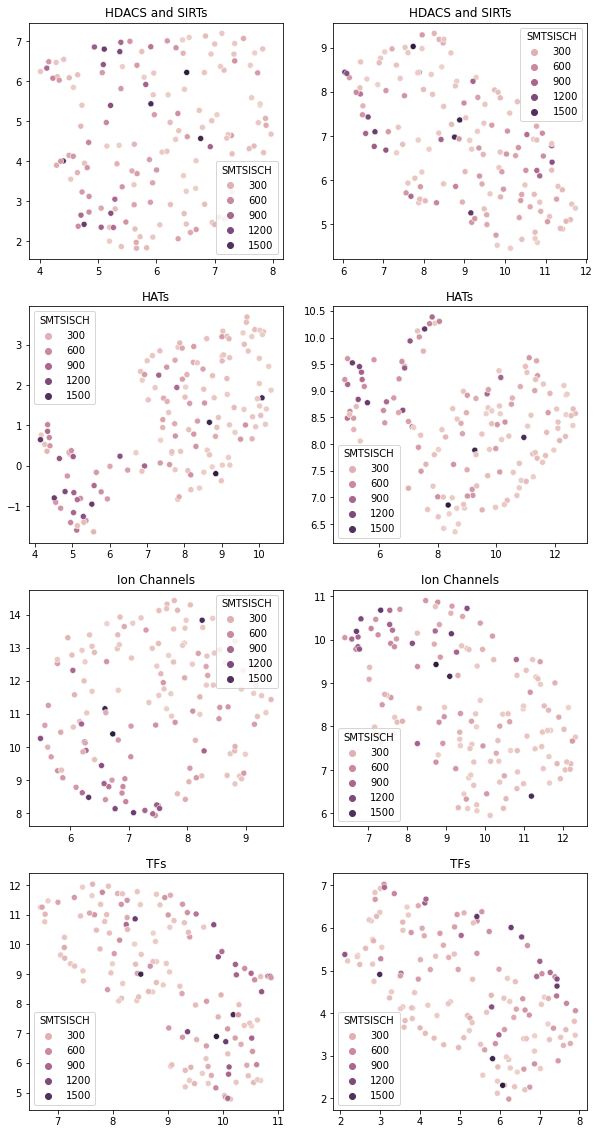

In [22]:
fig, axs = plt.subplots(4,2, figsize = (10,20))
sns.scatterplot(ax = axs[0][0], x = embedding_u_HnS[:,0] , y = embedding_u_HnS[:,1], hue = var)
axs[0][0].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][0], x = embedding_u_HATs[:,0] , y = embedding_u_HATs[:,1], hue = var)
axs[1][0].set_title('HATs')
sns.scatterplot(ax = axs[2][0], x = embedding_u_iChannels[:,0] , y = embedding_u_iChannels[:,1], hue = var)
axs[2][0].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][0], x = embedding_u_TFs[:,0] , y = embedding_u_TFs[:,1], hue = var)
axs[3][0].set_title('TFs')
sns.scatterplot(ax = axs[0][1], x = embedding_u_HnS_s[:,0] , y = embedding_u_HnS_s[:,1], hue = var)
axs[0][1].set_title('HDACS and SIRTs')
sns.scatterplot(ax = axs[1][1], x = embedding_u_HATs_s[:,0] , y = embedding_u_HATs_s[:,1], hue = var)
axs[1][1].set_title('HATs')
sns.scatterplot(ax = axs[2][1], x = embedding_u_iChannels_s[:,0] , y = embedding_u_iChannels_s[:,1], hue = var)
axs[2][1].set_title('Ion Channels')
sns.scatterplot(ax = axs[3][1], x = embedding_u_TFs_s[:,0] , y = embedding_u_TFs_s[:,1], hue = var)
axs[3][1].set_title('TFs')

In [23]:
All = ['HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11', 'SIRT1', 'SIRT2', 'SIRT3', 'SIRT4', 'SIRT5', 'SIRT6', 'SIRT7','KAT2A', 'KAT2B', 'HAT1', 'ATF2', 'KAT5', 'KAT6A', 'KAT6B', 'KAT7', 'EP300', 'CREBBP', 'NCOA1', 'NCOA3', 'TAF1', 'GTF3C1', 'CLOCK','SCN5A', 'CACNA1C', 'KCNH2', 'KCNJ2', 'ATP1A1', 'SLC8A1', 'ATP2A2', 'RYR2', 'GJA1','FOXO1', 'FOXO3', 'GATA4', 'GATA6', 'HIF1A', 'TRIM28', 'KLF4', 'KLF5', 'MEF2A', 'NFAT5', 'NFKB1', 'NKX25', 'NOTCH1', 'RUNX1', 'SHMT2', 'SOD1', 'TBX5', 'TGFB1', 'YY1']
data_3 = data[All]


In [24]:
embedder_t = TSNE(perplexity = 30, method = 'exact', metric = metric, square_distances = True, learning_rate = 'auto', init = 'random')
embedder_u = umap.UMAP(metric = metric)

In [25]:
all_et = embedder_t.fit_transform(data_3)
all_eu = embedder_u.fit_transform(data_3)

In [28]:
pd.DataFrame(all_eu).to_csv('all_eu.csv')

Text(0.5, 1.0, 'UMAP')

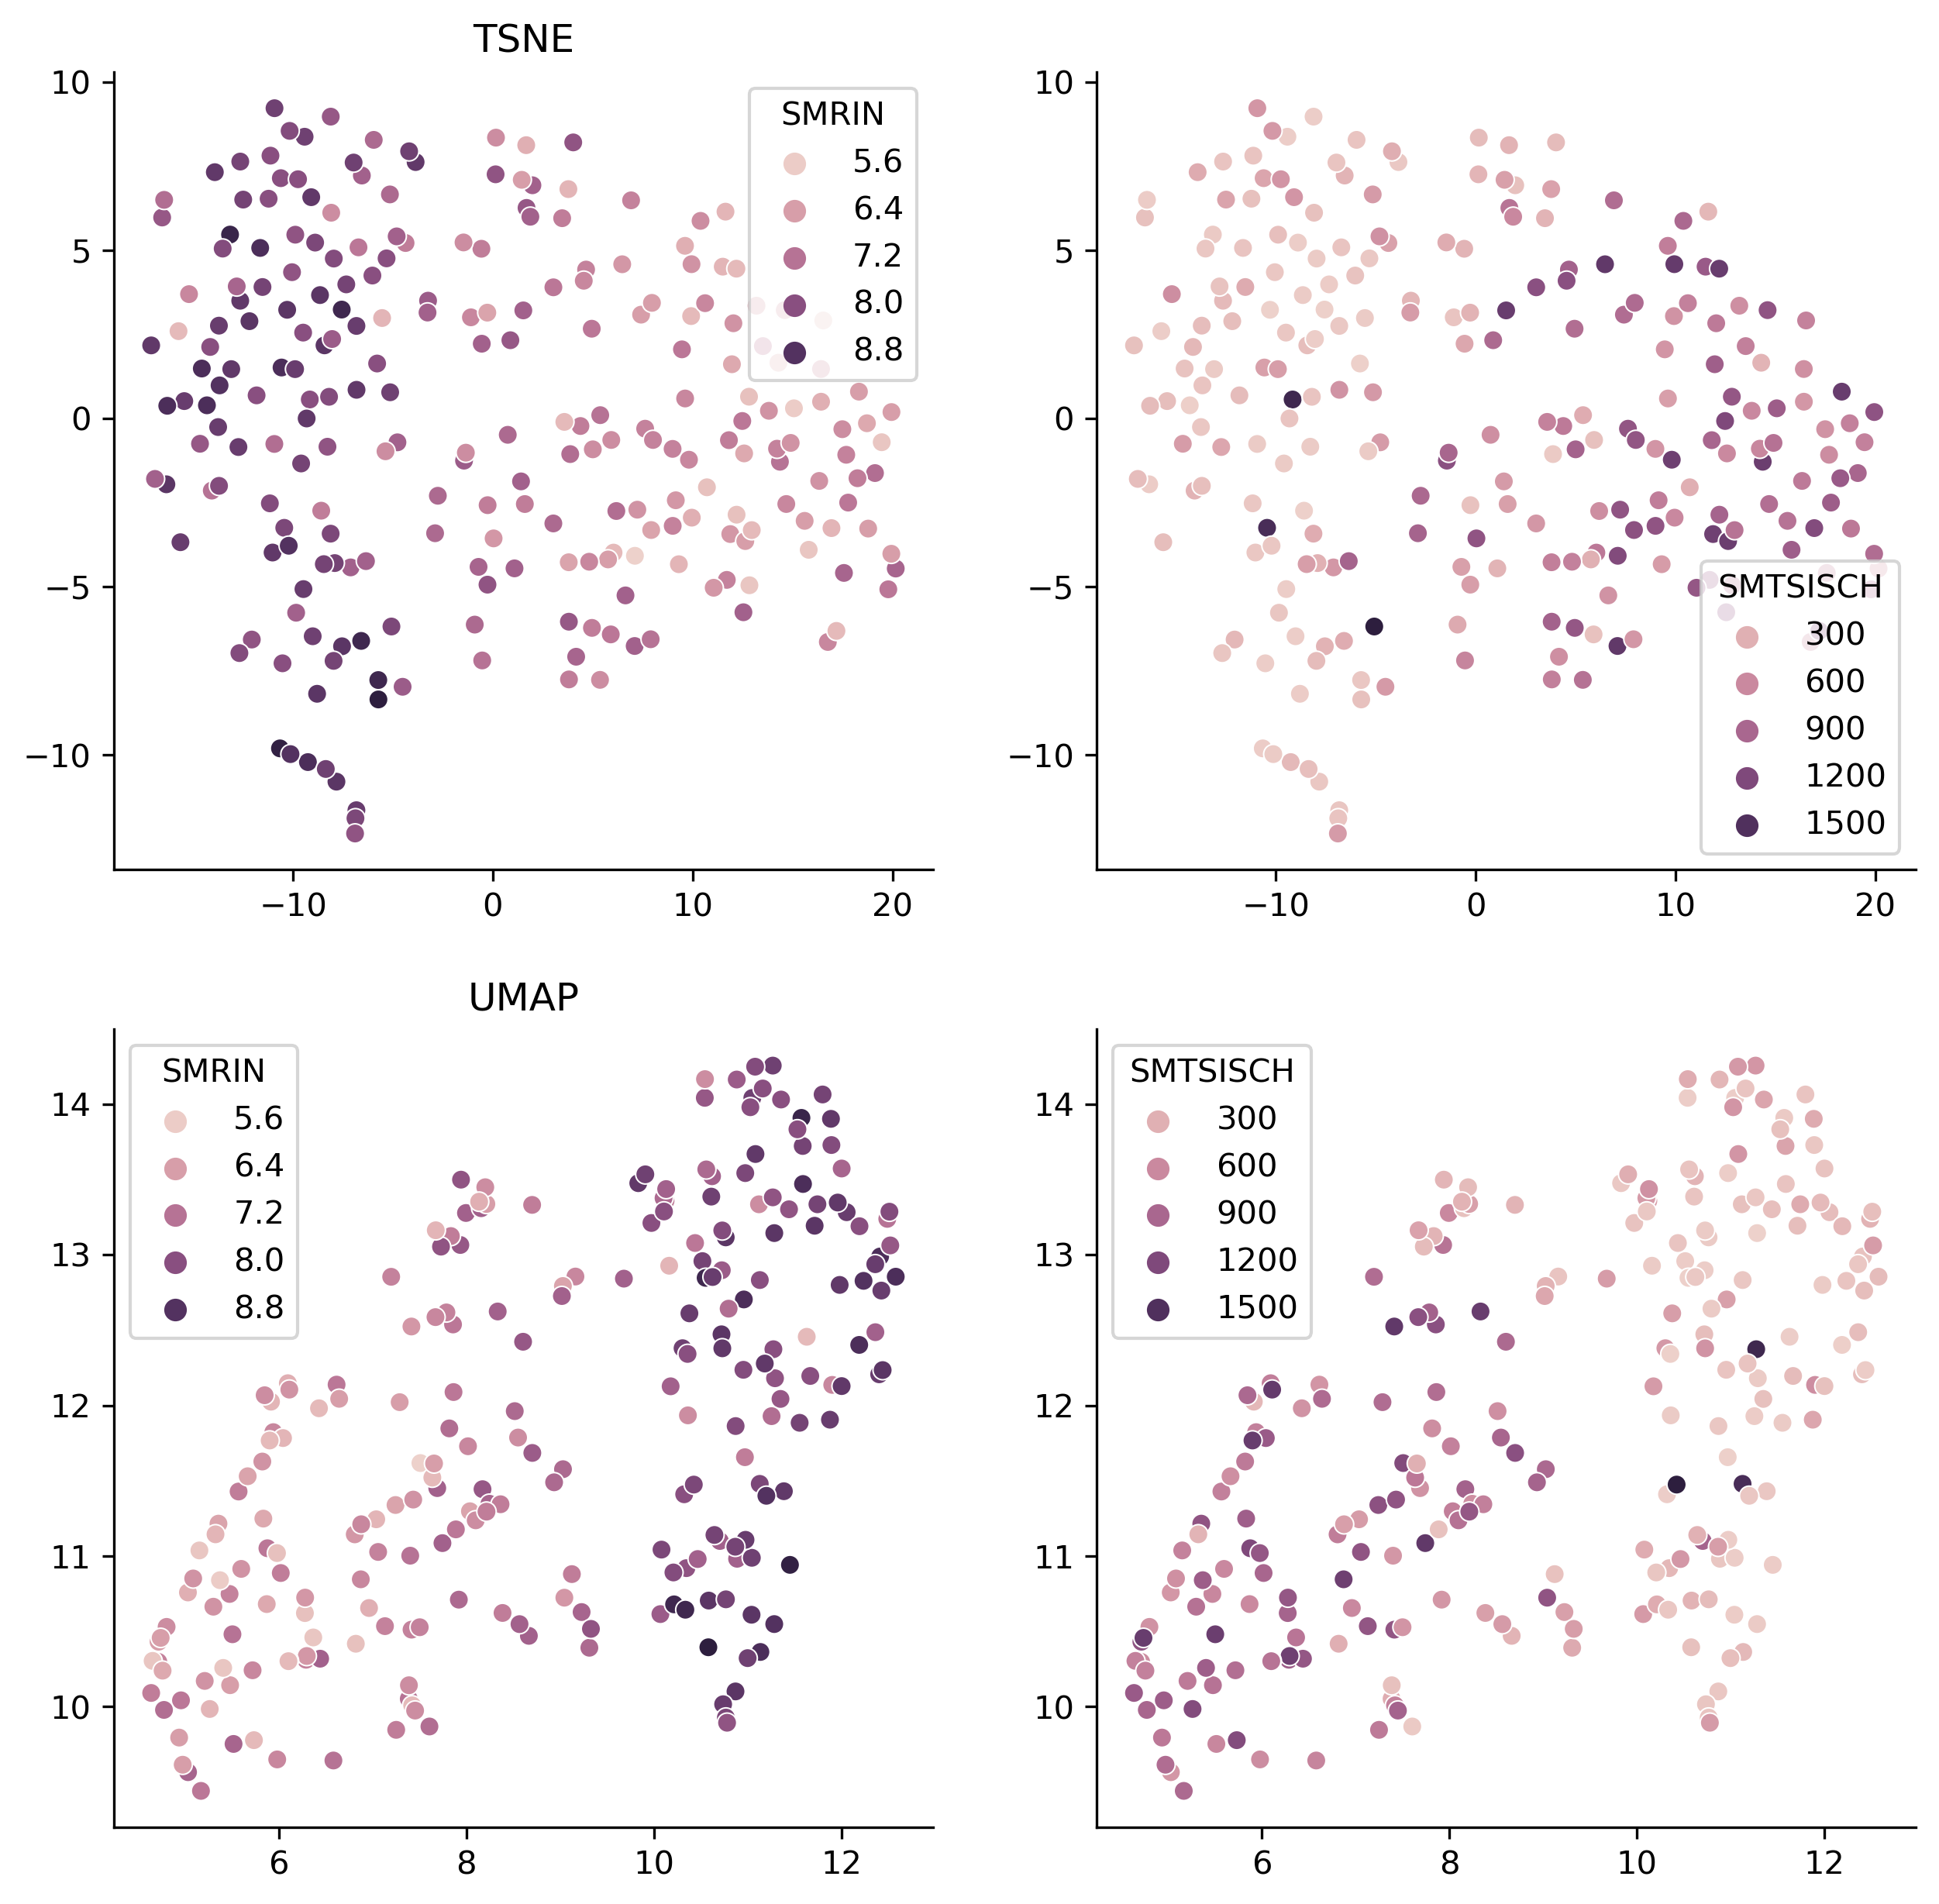

In [26]:
var  = data['SMRIN']
fig, axs = plt.subplots(2,2, figsize = (10,10), dpi = 300)
for i in range(len(axs)):
    for j in range(len(axs)):
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].spines['top'].set_visible(False)

sns.scatterplot(ax = axs[0][0], x = all_et[:,0] , y = all_et[:,1], hue = var)
axs[0][0].set_title('TSNE')
sns.scatterplot(ax = axs[1][0], x = all_eu[:,0] , y = all_eu[:,1], hue = var)
axs[1][0].set_title('UMAP')


var  = data['SMTSISCH']
sns.scatterplot(ax = axs[0][1], x = all_et[:,0] , y = all_et[:,1], hue = var)
axs[0][0].set_title('TSNE')
sns.scatterplot(ax = axs[1][1], x = all_eu[:,0] , y = all_eu[:,1], hue = var)
axs[1][0].set_title('UMAP')

(array([ 9., 10., 11., 12., 13., 14., 15.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

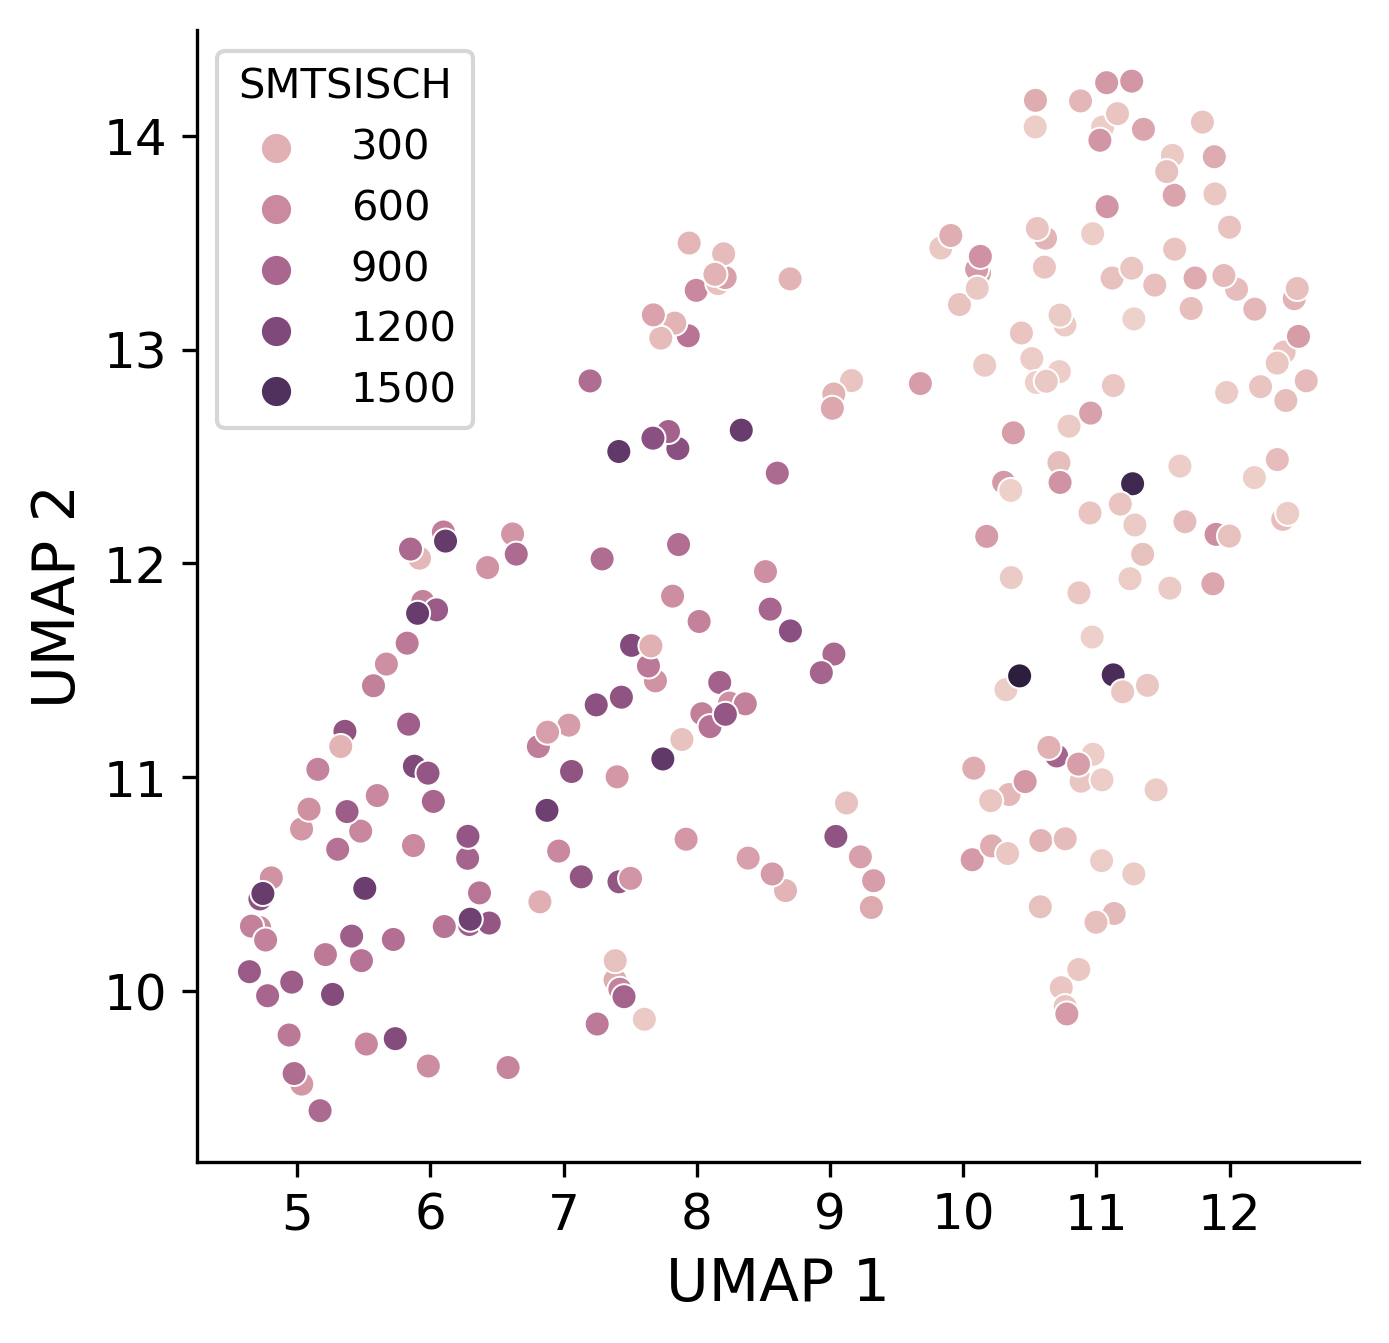

In [27]:

fig, ax = plt.subplots(1,1, figsize=(5,5), dpi = 300)
sns.scatterplot(ax = ax, x = all_eu[:,0] , y = all_eu[:,1], hue = var, sizes = np.ones(len(all_eu))*400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('UMAP 1', fontsize = 14)
plt.ylabel('UMAP 2', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
